# Simulating the behavior of a single ant foraging for food and lays back pheromone on its way back

Code written using [`jax`](https://jax.readthedocs.io/) with `jit` capability for faster evaluation of functions, loops and gradients

&copy; S Ganga Prasath -- 13 Mar, 2023

In [34]:
#@title Imports & Utils
# Imports
import numpy as onp
import matplotlib as mpl
import matplotlib.pyplot as plt
# from jax.config import config ; config.update('jax_enable_x64', True)
import jax.numpy as jnp
import jax
from jax import random
from jax import jit
from jax import vmap
from jax import lax

## Setting up the problem with preliminary tests

### Hard-core repulsive potential

$V(x) = \begin{cases} 
      \exp(-x/\epsilon) & x\leq 0.2 \\
      0 & x>0.2
   \end{cases}$

In [32]:
def hardCore(x):
  eps = 1e-2
  return jnp.where(x<=0.2, 1/jnp.exp(x/eps), 0)

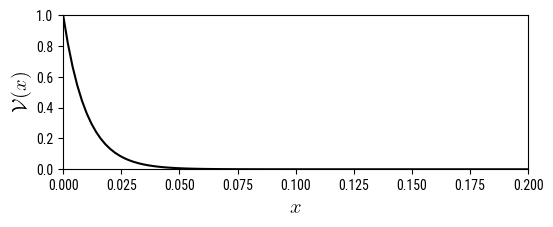

In [35]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc("font", family="Roboto Condensed")
plt.rc("xtick", labelsize="medium")

hCdx = jax.grad(hardCore)
hCdxVec = jax.vmap(hCdx)

xmax = 0.2
x = jnp.linspace(0,xmax,100)

fig = plt.figure(figsize=(6, 2), dpi=100)
ax = plt.subplot(xlim=[0, 0.20], ylim=[0, 1])
plt.rcParams.update({"text.usetex": True})

ax.plot(x, hardCore(x), c='k')
# ax.plot(x, hCdxVec(x))
ax.set_xlabel(r'$x$',usetex=True, fontsize=15)
ax.set_ylabel(r'$\mathcal{V}(x)$',usetex=True,rotation=90, fontsize=15)

plt.show()

### Gaussian white noise statistics

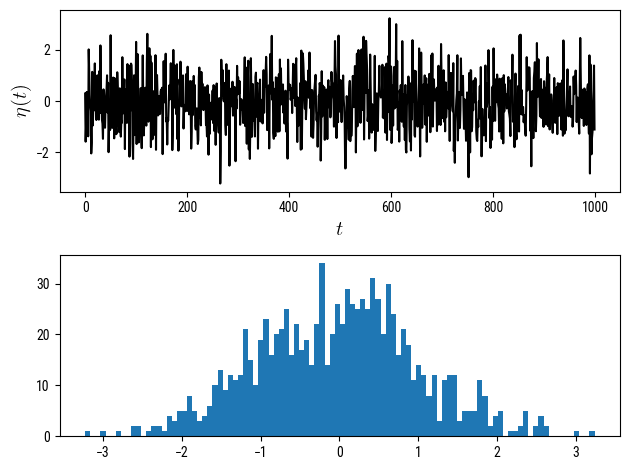

In [41]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc("font", family="Roboto Condensed")
plt.rc("xtick", labelsize="medium")

key = random.PRNGKey(42)
nmax = 1000
xLst = random.normal(key, shape=(nmax,))

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(xLst, c='k')
ax1.set_xlabel(r'$t$',usetex=True, fontsize=15)
ax1.set_ylabel(r'$\eta(t)$',usetex=True,rotation=90, fontsize=15)

ax2.hist(xLst, bins=100)

plt.tight_layout()
plt.show()

### Dynamics of an active brownian particle given by the Langevin equation:

$ \dot{\mathbf{r}}(t) = v_o \hat{\mathbf{n}}$

$ \dot{\theta}(t) = \sqrt{2D} \eta(t)$

where $\hat{\mathbf{n}} = (\cos \theta, \sin \theta)$ and $\langle \eta(t) \eta(t') = \delta(t-t') \rangle$.

In [94]:
class params():
    def __init__(self) -> None:
        super().__init__()
        self.nMax = 1000
        self.rInit = jnp.array([0, 0])
        self.thetInit = 0.
        self.dt = 1e-2
        self.diff = 1e-2
        self.vo = 0.5

class agent():
    def __init__(self) -> None:
        super().__init__()
        self.r = jnp.array([0., 0.])
        self.thet = 0.
        self.iStep = 0

In [95]:
def propgtr(p, agt, randF):
    agt.r += p.vo*jnp.array([jnp.cos(agt.thet), jnp.sin(agt.thet)])
    agt.thet += jnp.sqrt(p.diff*p.dt)*randF
    return agt

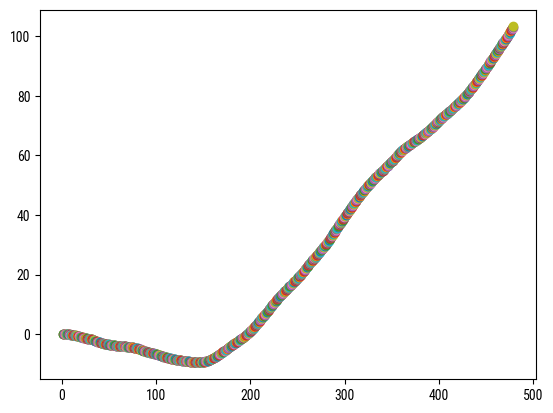

In [99]:
p = params()
ag = agent()
key = random.PRNGKey(42)
subkeys = random.split(key, p.nMax)

for ind in range(p.nMax-1):
    ag = propgtr(p, ag, random.normal(subkeys[ind]))
    plt.plot(ag.r[0], ag.r[1], 'o')
plt.show()

In [ ]:
key = random.PRNGKey(42)
subkeys = random.split(key, p.nMax)
sequence = np.stack([random.normal(subkey) for subkey in subkeys])

rp = rInit
thetp = thetInit
for ind in jnp.arange(nmax):
  thetn = thetp + jnp.sqrt(2*diff*dt)*etaLst[ind]
  rn = rp + vo*dt*jnp.array([jnp.cos(thetn), jnp.sin(thetn)])
  rp = rn
  thetp = thetn
  plt.plot(rn[0], rn[1], 'o')